In [83]:
import csv
import collections
import itertools
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
#load in data and distribute marked commits into to lists

In [3]:
commits_quality = []
index_quality = []

In [4]:
commits_not_quality = []
index_not_quality = []

In [5]:
with open("output_320000.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        if (row[-1] == 'False'):
            commits_quality.append(row[1])
            index_quality.append(row[0])
        if (row[-1] == 'True'):
            commits_not_quality.append(row[1])
            index_not_quality.append(row[0])

In [6]:
words_quality = list(itertools.chain(*[commit.split() for commit in commits_quality]))

In [7]:
words_not_quality = list(itertools.chain(*[commit.split() for commit in commits_not_quality]))

In [8]:
small_words = ['the', 'a', 'an',
               'for', 'in', 'on', 'into', 'from', 'to', 'with', 'via',
               'and', 'or', 'not',
               'when', 'what', 'which', 
               'that', 'this', 
               '###', 
               'should', 'can', 'could', 'will',
               'is', 'are', 'was', 'were', 'have', 
               'does', 'did', 'do', 
               'now', 'also', 'more', 'some', 'all']

In [9]:
counter1 = collections.Counter([e.lower() for e in words_quality if e.lower() not in small_words and len(e) > 2 and len(e) < 10])

In [10]:
counter2 = collections.Counter([e.lower() for e in words_not_quality if e.lower() not in small_words and len(e) > 2 and len(e) < 10])

In [11]:
n_keywords = 20

In [90]:
occ1 = counter1.most_common(n_keywords)
occ2 = counter2.most_common(n_keywords)

In [91]:
keyword1 = [tupel[0] for tupel in occ1]
keyword2 = [tupel[0] for tupel in occ2]

In [99]:
def find_conjugation(words):
    for i in range(len(words)):
        for j in range(i, len(words)):
            if words[j] == words[i] + "ed" \
            or words[j] == words[i] + "d" \
            or words[j] == words[i] + "s" \
            or words[j] == words[i] + "es" \
            or words[j] == words[i] + "ing"\
            or words[j] == words[i][:-1] + "ing":
                words[j] = words[i]

In [100]:
find_conjugation(keyword1)
find_conjugation(keyword2)

In [106]:
def count_frequency(words, counter):
    keywords = list(set(words))
    occurrence = np.zeros(len(keywords))
    for i in range(len(keywords)):
        for j in range(len(words)):
            if words[j] == keywords[i]:
                occurrence[i] = occurrence[i] + counter[j][1]
    return keywords, occurrence

In [108]:
keywords_quality, occ_quality = count_frequency(keyword1, occ1)

In [111]:
keywords_not_quality, occ_not_quality = count_frequency(keyword2, occ2)

In [113]:
keywords_not_quality

['use',
 'unused',
 'test',
 'javadoc',
 'java',
 'fix',
 'class',
 'minor',
 'code',
 'method',
 'new',
 'add',
 'remove',
 'moved',
 'make']

In [115]:
keywords = list(set(keywords_quality + keywords_not_quality))

In [119]:
frq_quality = np.zeros(len(keywords))
frq_not_quality = np.zeros(len(keywords))

In [120]:
for i in range(len(keywords)):
    if keywords[i] in keywords_quality:
        frq_quality[i] = occ_quality[keywords_quality.index(keywords[i])]
    if keywords[i] in keywords_not_quality:
        frq_not_quality[i] = occ_not_quality[keywords_not_quality.index(keywords[i])]

In [121]:
frq_quality

array([  0.,  68.,   0.,   0.,  46., 412.,   0., 125., 134.,  60.,  79.,
        45.,  50.,   0., 133.,  52.,   0.,   0., 333.,   0.,  51.,  51.,
        84.])

In [122]:
frq_not_quality

array([ 83.,   0.,  23.,  55.,   0.,  93., 155.,   0.,  26.,   0.,   0.,
        64.,   0.,  27.,  62.,   0.,  28.,  34., 108.,  24.,   0.,  71.,
        27.])

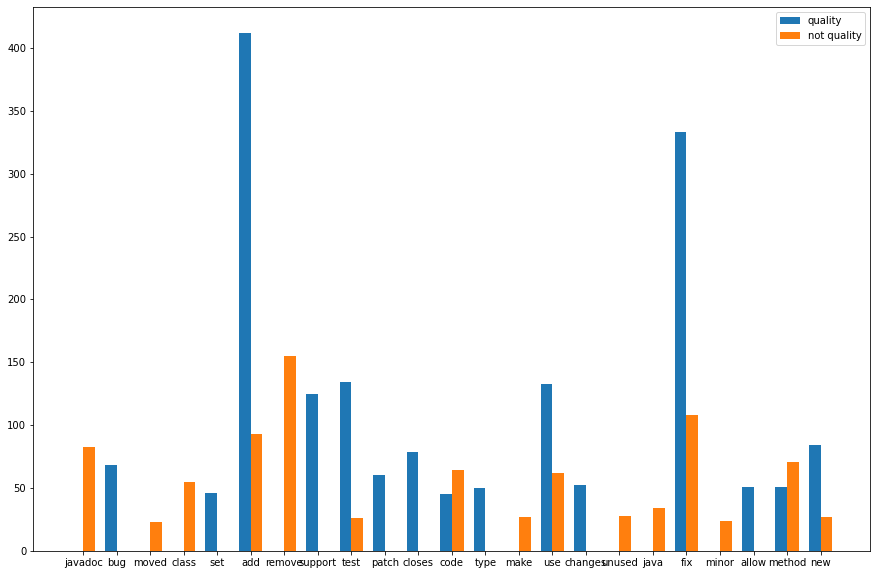

In [124]:
x = np.arange(len(keywords))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, frq_quality, width, label = "quality")
ax.bar(x + width/2, frq_not_quality, width, label = "not quality")
ax.set_xticks(x)
ax.set_xticklabels(keywords)
ax.legend()
plt.show()